In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Reshape

2022-11-15 16:10:30.484439: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 16:10:30.502544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 16:10:30.502554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Preprocessing

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0


# Model Architecture

In [141]:
model = tf.keras.models.Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(60, (5, 5), activation="relu"))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(28 * 28, activation="sigmoid"))
model.add(Reshape((28, 28, 1), input_shape=(28 ** 2,)))
model.compile(optimizer="adam", metrics=["accuracy"], loss="MSE")
model.fit(X_train, X_train, batch_size=40, epochs=5, validation_split=0.2, shuffle=True)
model.evaluate(X_test, y_test)

Epoch 1/5
1200/1200 [==============================] - 21s 18ms/step - loss: 0.0202 - accuracy: 0.8090 - val_loss: 0.0088 - val_accuracy: 0.8152
Epoch 2/5
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0075 - accuracy: 0.8146 - val_loss: 0.0067 - val_accuracy: 0.8156
Epoch 3/5
1200/1200 [==============================] - 24s 20ms/step - loss: 0.0062 - accuracy: 0.8149 - val_loss: 0.0059 - val_accuracy: 0.8158
Epoch 4/5
1200/1200 [==============================] - 27s 22ms/step - loss: 0.0056 - accuracy: 0.8149 - val_loss: 0.0055 - val_accuracy: 0.8158
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 27.0744 - accuracy: 0.0997


[27.074420928955078, 0.09974931925535202]

# Test Accuracy

In [ ]:
model.evaluate(X_test, X_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0376 - accuracy: 0.8010


[0.03764659911394119, 0.8010439872741699]

# Prediction

In [142]:
pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 60)          96060     
                                                                 
 flatten_2 (Flatten)         (None, 3840)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               384100    
                                                                 
 dense_5 (Dense)             (None, 784)               79184     
                                                      

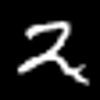

Decoded


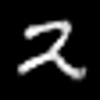

In [198]:
print(model.summary())
index = np.random.randint(0, len(pred))
print(y_test[index])
orig_img = Image.fromarray(X_test[index].reshape(28, 28) * 255).convert("L").resize((100, 100), Image.Resampling.BICUBIC)
decoded = Image.fromarray(pred[index].reshape(28, 28) * 255).convert("L").resize((100, 100), Image.Resampling.BICUBIC)
print("Original")
display(orig_img)
print("Decoded")
display(decoded)